In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import svm

In [13]:
# make points
N = 15
random.seed(11813)
train_X= np.array([[random.randint(0,100),random.randint(0,100)] for i in range(N)])
train_X

array([[ 46, 100],
       [ 93,  58],
       [ 82,  90],
       [ 97,  67],
       [ 95,  53],
       [ 79,  30],
       [ 72,  18],
       [  6,  47],
       [ 28,  26],
       [ 23,  26],
       [ 44,  80],
       [ 60,  17],
       [  3,  18],
       [ 14,  62],
       [ 45,  86]])

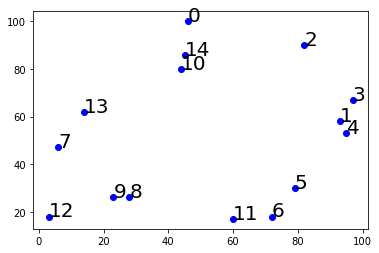

In [16]:
# plot
for i in range(len(train_X)):
  plt.plot(train_X[i][0], train_X[i][1], 'o', color='blue')
  plt.annotate(i, (train_X[i][0], train_X[i][1]), size=20)


In [32]:
# 手で分類する
train_Y = np.array([0 for i in range(N)])
train_Y[2] = train_Y[3] = train_Y[1] = train_Y[4] = train_Y[5] = train_Y[6] = train_Y[11] = 1

Text(30, 60, 'test')

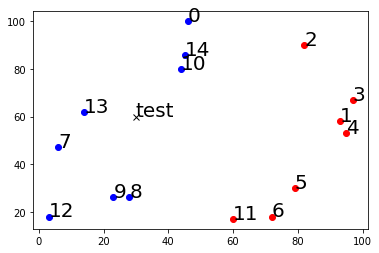

In [42]:
# plot
colors = ['blue', 'red']
for i in range(len(train_X)):
  plt.plot(train_X[i][0], train_X[i][1], 'o', color=colors[train_Y[i]])
  plt.annotate(i, (train_X[i][0], train_X[i][1]), size=20)

# add test_X plot
test_X = np.array([[30, 60]])
plt.plot(test_X[0][0], test_X[0][1], 'x', color='black')
plt.annotate('test', (test_X[0][0], test_X[0][1]),size=20)

array([0])

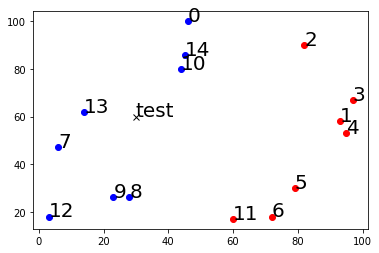

In [51]:
# plot
colors = ['blue', 'red']
for i in range(len(train_X)):
  plt.plot(train_X[i][0], train_X[i][1], 'o', color=colors[train_Y[i]])
  plt.annotate(i, (train_X[i][0], train_X[i][1]), size=20)

# add test_X plot
test_X = np.array([[30, 60]])
plt.plot(test_X[0][0], test_X[0][1], 'x', color='black')
plt.annotate('test', (test_X[0][0], test_X[0][1]),size=20)

# use SVM
clf = svm.SVC(gamma=0.0001, C=1)
clf.fit(train_X, train_Y)

# 分類する
test_y = clf.predict(test_X)
test_y

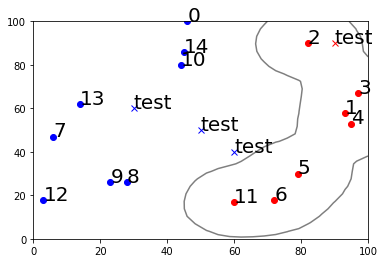

In [57]:
# plot
colors = ['blue', 'red']
for i in range(len(train_X)):
  plt.plot(train_X[i][0], train_X[i][1], 'o', color=colors[train_Y[i]])
  plt.annotate(i, (train_X[i][0], train_X[i][1]), size=20)

# add test_X plot
test_X = np.array([[30, 60], [90, 90], [50, 50], [60, 40]])
#plt.plot(test_X[0][0], test_X[0][1], 'x', color='black')
#plt.annotate('test', (test_X[0][0], test_X[0][1]), size=20)

# use SVM
clf = svm.SVC(gamma=0.01, C=1)
clf.fit(train_X, train_Y)

# 分類する
test_Y = clf.predict(test_X)
test_Y

# plot test_Y
for i in range(len(test_X)):
  plt.plot(test_X[i][0], test_X[i][1], 'x', color=colors[test_Y[i]])
  plt.annotate('test', (test_X[i][0], test_X[i][1]), size=20)

# 決定境界を描画する
x = np.linspace(0, 100, 30)
y = np.linspace(0, 100, 30)
yy, xx = np.meshgrid(y, x)
xy = np.vstack([xx.ravel(), yy.ravel()]).T
P = clf.decision_function(xy).reshape(xx.shape)
plt.contour(xx, yy, P, colors='k',
            levels=[0], alpha=0.5,
            linestyles=['-'])
